# 数値化
### requires
- pip install matplotlib
- pip install japanize_matplotlib

sample: @vaaaaanquish 2019年4月時点

In [5]:
import pandas as pd
import pickle
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import HTML
import japanize_matplotlib

with open('../data/twdata.pkl', 'rb') as f:
    df = pickle.load(f)

## 平均、分散、%ile

In [27]:
pd.options.display.float_format = '{:.2f}'.format
pd.options.display.precision = 1
df[['favourites_count', 'friends_count', 'favourites_count', 'listed_count', 'statuses_count', 'description_length']].describe()

,favourites_count,friends_count,favourites_count,listed_count,statuses_count,description_length
count,20903.00,20903.00,20903.00,20903.00,20903.00,20903.00
mean,17825.89,4940.49,17825.89,58.05,31401.68,58.41
std,55359.82,57023.32,55359.82,385.24,335105.31,48.55
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,176.00,222.00,176.00,1.00,278.00,15.00
50%,1859.00,546.00,1859.00,6.00,3090.00,48.00
75%,11421.50,1270.50,11421.50,28.00,22451.00,95.00
max,1718161.00,2240216.00,1718161.00,21636.00,47086996.00,180.00


## 月毎のアカウント生成数

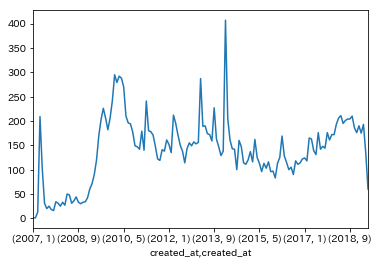

In [18]:
df.groupby([df["created_at"].dt.year,df["created_at"].dt.month]).count()['created_at'].plot()

## 相互フォロー

In [34]:
len(df.query('followed and following'))

13674

## 片思い

In [36]:
len(df.query('~followed and following'))

2231

## 片思われ

In [38]:
len(df.query('followed and ~following'))

4922

## フォローされている認証アカウントの数

In [37]:
len(df.query('verified and followed'))

63

## 利用言語

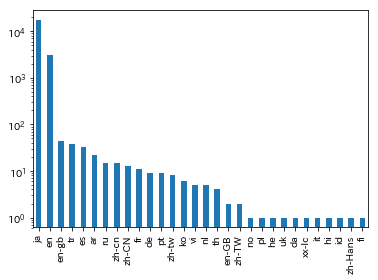

In [95]:
df.lang.value_counts().plot(kind="bar", logy=True)

## 最新ツイートにおける利用クライアント Top 30

In [49]:
df.toptweet_source = df.toptweet_source.apply(lambda x: x.split('>')[1].split('<')[0] if type(x)==str else '')
df.toptweet_source.value_counts()[:30]

Twitter for iPhone      7906
Twitter for Android     3658
Twitter Web Client      2599
                        1235
Twitter Web App          932
TweetDeck                781
twittbot.net             343
Twitter for iPad         302
ツイ廃あらーと                  249
Tweetbot for iΟS         195
feather for iOS           99
Peing                     87
はてなブックマーク                 64
Echofon                   59
IFTTT                     55
twitcle plus              55
TheWorld iOS              54
Keitai Web                48
YoruFukurou               46
Foursquare                42
on TheWorld               42
creativefotoapp           42
kiemxienonlinenhanh       41
twicca                    40
FindFriendToFollow        40
freaingapp                38
TwitPane for Android      38
whatsapplicationsss       38
Facebook                  37
Buffer                    33
Name: toptweet_source, dtype: int64

- 新興サービスでPeingすごい

## ソフトウェアエンジニアっぽい人

In [59]:
len(df[df.description.str.contains('エンジニア') | df.description.str.contains('ソフトウェア') | df.description.str.contains('開発')])

2520

- 意外とbioには書いてない

## 宗教戦争

In [69]:
for x in [('vim', 'Vim'), ('emacs', 'Emacs')]:
    c = 0
    for y in x:
        c+=len(df[df.description.str.contains(f'{y}')])
    print(f'{x[0]}', c)

vim 150
emacs 38


In [85]:
for x in [('python', 'Python'),('c\+\+', 'C\+\+'), ('julia','Julia'), ('ruby', 'Ruby'), ('javascript', 'JavaScript','JS'), ('PHP', 'php'), ('swift', 'Swift')]:
    c = 0
    for y in x:
        c+=len(df[df.description.str.contains(f'{y}')])
    print(f'{x[0]}'.replace('\\',''), c)

python 1171
c++ 300
julia 37
ruby 380
javascript 361
PHP 329
swift 153


- python書きがち

In [88]:
for x in ['機械学習', '深層学習', 'Deep Learning', 'DeepLearning', 'Machine Learning', 'MachineLearning']:
    c = len(df[df.description.str.contains(f'{x}')])
    print(f'{x}'.replace('\\',''), c)

機械学習 818
深層学習 69
Deep Learning 69
DeepLearning 50
Machine Learning 94
MachineLearning 37


- 意外と書いてあるが、これだけか感

In [91]:
for x in [('Android', 'android'), ('iPhone','iphone')]:
    c = 0
    for y in x:
        c+=len(df[df.description.str.contains(f'{y}')])
    print(f'{x[0]}', c)

Android 230
iPhone 81


- 何でAndroidの方が書かれるんだろう

In [89]:
for x in ['興味あり','憧れ','勉強中','初心者']:
    c = len(df[df.description.str.contains(f'{x}')])
    print(f'{x}', c)

興味あり 93
憧れ 27
勉強中 433
初心者 178


- 人類皆勉強

In [96]:
df.columns

Index(['contributors_enabled', 'created_at', 'default_profile',
       'default_profile_image', 'description', 'description_expanded_url_0',
       'description_expanded_url_1', 'description_expanded_url_2',
       'description_expanded_url_3', 'description_expanded_url_4',
       'description_expanded_url_num', 'expanded_url_0', 'expanded_url_num',
       'favourites_count', 'follow_request_sent', 'followers_count',
       'following', 'friends_count', 'get_date', 'id_str', 'lang',
       'listed_count', 'location', 'name', 'profile_banner_url',
       'profile_image_url', 'protected', 'screen_name', 'statuses_count',
       'time_zone', 'toptweet_created_at', 'toptweet_id', 'toptweet_lang',
       'toptweet_retweet_flag', 'toptweet_source', 'toptweet_text', 'url',
       'verified', 'description_length', 'diff_created_at',
       'diff_toptweet_created_at', 'sn_length', 'followed', 'joined_list',
       'follower_number', 'followii_number'],
      dtype='object')

## フォロバしてない人のbio

In [111]:
nofollow_df = df[~(df['following']) & ~(df['follow_request_sent'])]

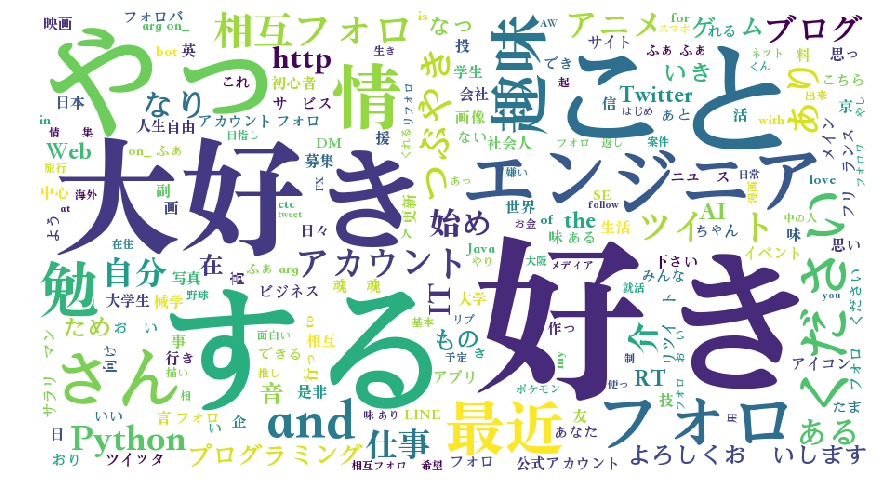

In [114]:
from wordcloud import WordCloud
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import MeCab as mc
fpath = "/Library/Fonts/Songti.ttc"
tagger = mc.Tagger('-Ochasen -d /usr/local/lib/mecab/dic/mecab-ipadic-neologd')

def mecab_analysis(text):
    words = tagger.parse(text)
    outputs = []  
    for w in words.split('\n'):  
        word = w.split('\t')  
        if word[0] == 'EOS':  
            break    
        word_type = word[3].split('-')[0]  
        if word_type in ['形容詞', '動詞', '名詞']:  
            outputs.append(word[0])  
    return outputs  

texts = []
for x in nofollow_df.description.tolist():
    texts += mecab_analysis(x)

stop_words = [ u'てる', u'いる', u'なる', u'https', u'co', u'https']

wordcloud = WordCloud(background_color="white",
                      font_path=fpath, width=900, height=500,
                      stopwords=set(stop_words)).generate(' '.join(list(texts)))

plt.figure(figsize=(15,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

- 人の好きを利用してやろうというアカウントをフォロバしない感